In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
import pandas as pd
import seaborn as sns
import random

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

['setosa', 'versicolor', 'virginica']


In [ ]:
def normalize(data):
  max, min = data.max(), data.min()
  data_norm = (data - min) / (max - min)
  return data_norm

In [ ]:
def normalize_dataset(iris_data):
  norm_sepal_length = normalize(iris_data[:,0])
  norm_sepal_width = normalize(iris_data[:,1])
  norm_petal_length = normalize(iris_data[:,2])
  norm_petal_width = normalize(iris_data[:,3])
  data_norm = np.stack([norm_sepal_length, norm_sepal_width, norm_petal_length, norm_petal_width])
  return data_norm.transpose()

In [ ]:
def split_train_test(data, target):
    N = len(data)

    # 75% от всех данных - обучающая выборка
    pointer = int(N*.5)
    #print(pointer)

    indx = np.arange(N)
    np.random.shuffle(indx)

    #print(indx)

    # train = data[indx[:pointer]]
    train, train_target = data[indx[:pointer]], target[indx[:pointer]]
    # test = data[indx[pointer:]]
    test, test_target = data[indx[pointer:]], target[indx[pointer:]]
    # return train, test
    return train, train_target, test, test_target

In [ ]:
def distance_between_data(point1, point2):
  dist = 0
  for col in range(len(point1)): ## Loop over the columns of the row
    dist += (point1[col] - point2[col]) **2
  return np.sqrt(dist)

In [ ]:
def sorted_distance_target(train, test_point, train_target):
  distances = []  ## create empty list called distances
  targets = []
  arr = []
  for row in range(len(train)): ## Loop over the rows of x_train
    dist = distance_between_data(train[row], test_point) ## Append the distances
    # targets.append()
    arr.append([dist, train_target[row]])

  # Store distances in a dataframe
  # distances = pd.DataFrame(data=distances,columns=['dist'])

  # return distances, targets
  a = np.asarray(arr)
  return a[a[:, 0].argsort()]


In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])

In [ ]:
norm_data = normalize_dataset(iris['data'])
norm_df = pd.DataFrame(data= np.c_[norm_data, iris['target']],
                      columns= iris['feature_names'] + ['target'])

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

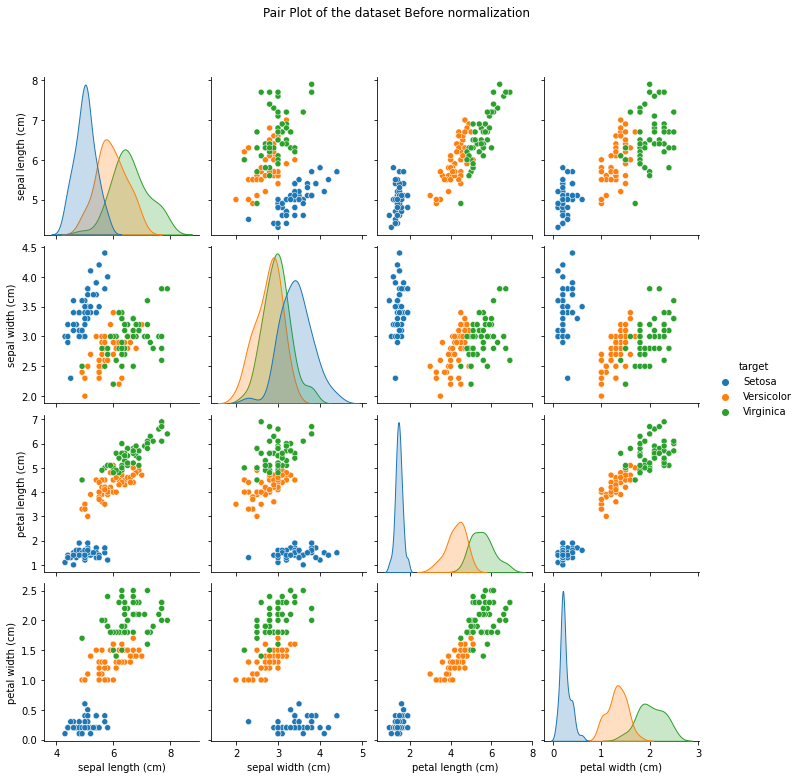

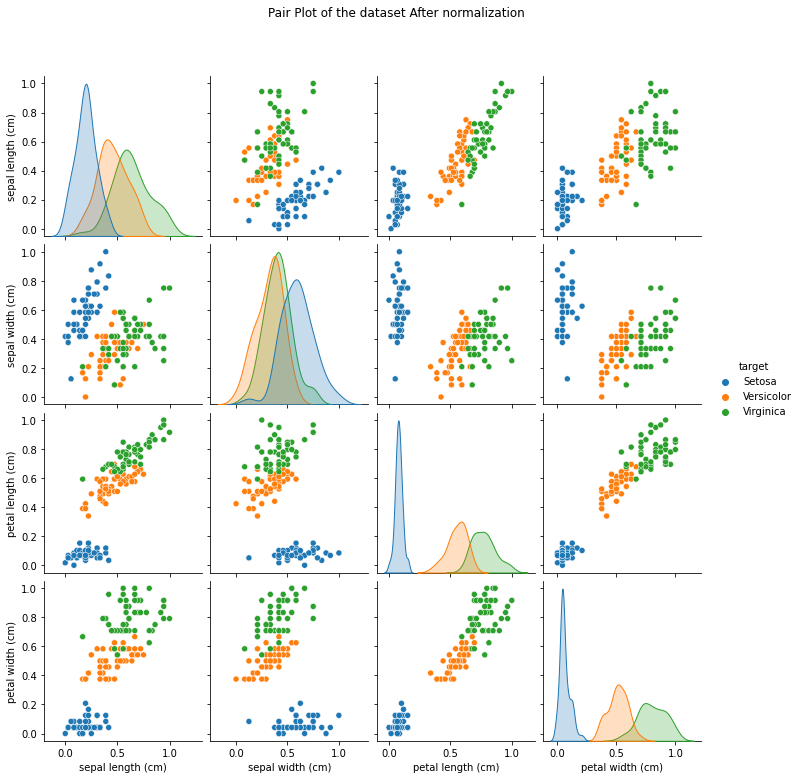

In [ ]:
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before = sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

after = sns.pairplot(norm_df.replace({'target': di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)


In [ ]:
print(list(zip(norm_data, iris['target'])))

[(array([0.22222222, 0.625     , 0.06779661, 0.04166667]), 0), (array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), 0), (array([0.11111111, 0.5       , 0.05084746, 0.04166667]), 0), (array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), 0), (array([0.19444444, 0.66666667, 0.06779661, 0.04166667]), 0), (array([0.30555556, 0.79166667, 0.11864407, 0.125     ]), 0), (array([0.08333333, 0.58333333, 0.06779661, 0.08333333]), 0), (array([0.19444444, 0.58333333, 0.08474576, 0.04166667]), 0), (array([0.02777778, 0.375     , 0.06779661, 0.04166667]), 0), (array([0.16666667, 0.45833333, 0.08474576, 0.        ]), 0), (array([0.30555556, 0.70833333, 0.08474576, 0.04166667]), 0), (array([0.13888889, 0.58333333, 0.10169492, 0.04166667]), 0), (array([0.13888889, 0.41666667, 0.06779661, 0.        ]), 0), (array([0.        , 0.41666667, 0.01694915, 0.        ]), 0), (array([0.41666667, 0.83333333, 0.03389831, 0.04166667]), 0), (array([0.38888889, 1.        , 0.08474576, 0.125     ]), 0), (array(

In [ ]:
print(train, train_target)

In [ ]:
for i in list(zip(test, test_target)):
  print(i)

Text(0, 0.5, 'Error Rate')

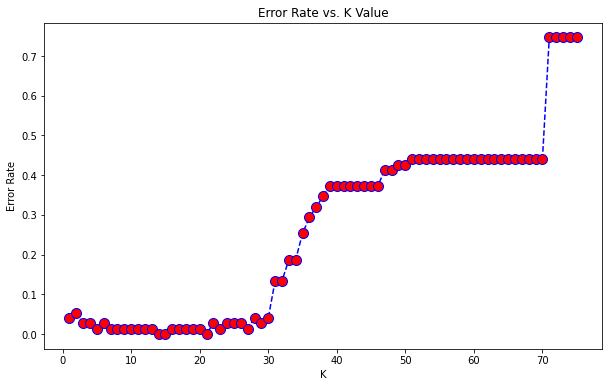

In [ ]:
train, train_target, test, test_target = split_train_test(norm_data, iris['target'])

distances = []
for test_point in test:
  distances.append(sorted_distance_target(train, test_point, train_target))
max_k = len(iris['data']) // 2 + 1

error_rate = []

# print(distances[0])
# unique, counts = np.unique(distances[0][:,1][:1], return_counts=True)
# counter = dict(zip(unique, counts))
# print(counter)
# predict_target = max(counter, key=counter.get)
# print(predict_target, test_target[0])
# print(test_target[0] != predict_target)
for k in range(1, max_k):
  predict_target = []
  for i in range(len(test)):
    unique, counts = np.unique(distances[i][:,1][:k], return_counts=True)
    counter = dict(zip(unique, counts))
    # print(counter)
    predict_target.append(max(counter, key=counter.get))
    # if test_target[i] != predict_target:
    #   error_rate[k] += 1
  error_rate.append(np.mean(predict_target != test_target))
plt.figure(figsize=(10,6))
plt.plot(range(1,max_k),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# print(error_rate)

In [ ]:
min_err = np.asarray(error_rate).min()

k = 1
indxs = []
offered = np.sqrt(len(iris['data']))
dist = 1000
for i, err in enumerate(error_rate):
  # print(i, " ", err)
  if err == min_err and dist > abs(i - offered):
    k = i
    dist = abs(i - offered)
print(k, offered)

13 12.24744871391589


In [ ]:
new_iris = [6.5, 3.1 , 3.2, 2. ]
k = 13
def normalize_new_data(data):
  min1, max1 = iris['data'][:,0].min(), iris['data'][:,0].max()
  min2, max2 = iris['data'][:,1].min(), iris['data'][:,1].max()
  min3, max3 = iris['data'][:,2].min(), iris['data'][:,2].max()
  min4, max4 = iris['data'][:,3].min(), iris['data'][:,3].max()
  d1 = (data[0] - min1)/(max1 - min1)
  d2 = (data[1] - min2)/(max2 - min2)
  d3 = (data[2] - min3)/(max3 - min3)
  d4 = (data[3] - min4)/(max4 - min4)
  return [d1, d2, d3, d4]
  # return data_norm.transpose()
norm_new_iris = normalize_new_data(new_iris)
print(norm_new_iris)
distancies_for_new_iris = sorted_distance_target(norm_data, norm_new_iris, iris['target'])
# print(distancies_for_new_iris)
unique, counts = np.unique(distancies_for_new_iris[:,1][:k], return_counts=True)
counter = dict(zip(unique, counts))
print(max(counter, key=counter.get))

[0.611111111111111, 0.4583333333333333, 0.3728813559322034, 0.7916666666666666]
1.0


Text(0.5, 1.08, 'Pair Plot of the dataset After adding new iris')

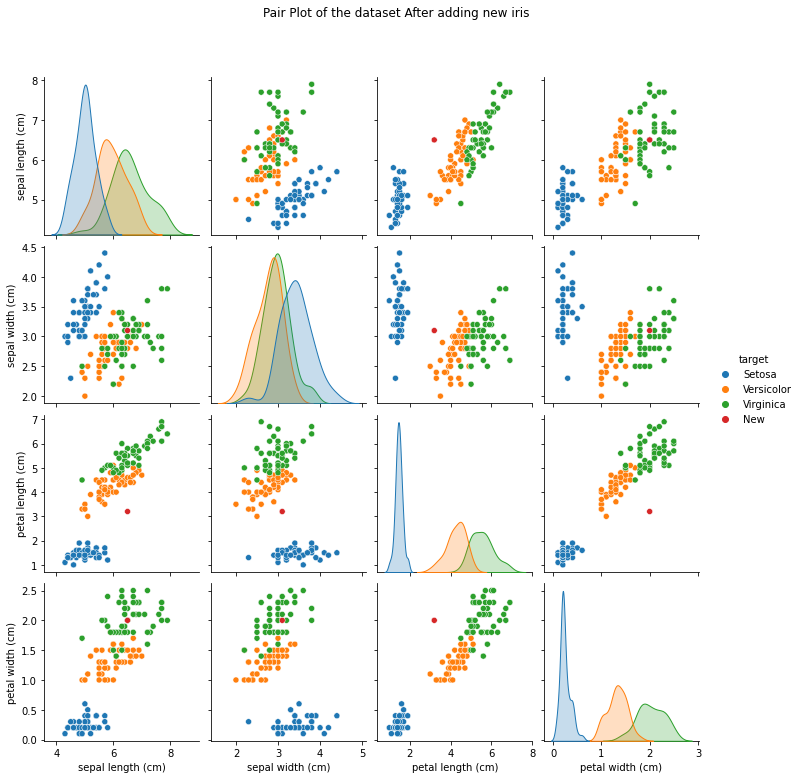

In [ ]:

new_iris_df = pd.DataFrame(data= np.c_[np.append(iris['data'], [new_iris], axis = 0), np.append(iris['target'], 3.0)],
                      columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica', 3.0:'New'} # dictionary
after2 = sns.pairplot(new_iris_df.replace({'target': di}), hue= 'target')
after2.fig.suptitle('Pair Plot of the dataset After adding new iris', y=1.08)



---
other


In [ ]:
new_iris

[6.5, 3.1, 5.2, 2.0]

In [ ]:
iris['data']

In [ ]:
np.append(iris['target'], 3.0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.])

In [ ]:
np.append(iris['data'], [new_iris], axis = 0)
# print(iris['data'])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
np.mean(True)

1.0

In [ ]:
arr = []
arr.append([3,2])
arr.append([1,1])
a = np.asarray(arr)
a = a[a[:, 1].argsort()[::-1]]
print(a)

[[3 2]
 [1 1]]


In [ ]:
counter = {1: 8, 4: 6, 2: 17}
max(counter, key=counter.get)

2

In [ ]:
print(norm_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0             0.222222          0.625000           0.067797          0.041667   
1             0.166667          0.416667           0.067797          0.041667   
2             0.111111          0.500000           0.050847          0.041667   
3             0.083333          0.458333           0.084746          0.041667   
4             0.194444          0.666667           0.067797          0.041667   
..                 ...               ...                ...               ...   
145           0.666667          0.416667           0.711864          0.916667   
146           0.555556          0.208333           0.677966          0.750000   
147           0.611111          0.416667           0.711864          0.791667   
148           0.527778          0.583333           0.745763          0.916667   
149           0.444444          0.416667           0.694915          0.708333   

     target  
0       0.0  

In [ ]:
train, train_target, test, test_target = split_train_test(norm_data, iris['target'])
print(len(train), len(train_target))
print(len(test), len(test_target))
print(len(iris['data']))
print(train, train_target)
print("target")
print(test, test_target)

112 112
38 38
150
[[0.75       0.5        0.62711864 0.54166667]
 [0.38888889 0.41666667 0.54237288 0.45833333]
 [0.66666667 0.41666667 0.6779661  0.66666667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.5        0.33333333 0.50847458 0.5       ]
 [0.38888889 0.25       0.42372881 0.375     ]
 [0.94444444 0.75       0.96610169 0.875     ]
 [0.25       0.625      0.08474576 0.04166667]
 [0.58333333 0.29166667 0.72881356 0.75      ]
 [0.30555556 0.41666667 0.59322034 0.58333333]
 [0.55555556 0.125      0.57627119 0.5       ]
 [0.55555556 0.29166667 0.66101695 0.70833333]
 [0.19444444 0.5        0.03389831 0.04166667]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.13888889 0.45833333 0.10169492 0.04166667]
 [0.36111111 0.33333333 0.66101695 0.79166667]
 [0.33333333 0.125      0.50847458 0.5       ]
 [0.33333333 0.20833333 0.50847458 0.5       ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.47222222 0.08333333 0.6779661  0.58333333]
 [0.66666667 0.20833333 0.81355932 0.70833

In [ ]:
iris_dataframe = pd.DataFrame(iris['data'], columns=iris.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [ ]:
print(iris['data'][:,2].max(), " ", iris['data'][:,2].min())
print(iris['data'][:,2])

6.9   1.0
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


In [ ]:
norm_data = normalize_dataset(iris['data'])
print(len(norm_data))
print(len(iris['data'][:,0]))

150
150


In [ ]:
norm_sepal_length = normalize(iris['data'][:,0])
norm_sepal_width = normalize(iris['data'][:,1])
norm_petal_length = normalize(iris['data'][:,2])
norm_petal_width = normalize(iris['data'][:,3])
print(np.stack([norm_petal_length]))
# print(np.stack([norm_sepal_length,norm_sepal_width]).transpose())